## 실습1:

####  다음  [그림 6] 의 트리를 읽어,  [그림 4] 의 균형 이진 탐색 트리로 변환하고자 한다. 다음에 답하시오.  
![Altext](fig14-6.png)

### (a). [그림 6] 의 3-ary 트리를 생성하는 파이썬 코드를 작성해 보시오. 

In [1]:
class M_ary_Node_Traversal2:
  # 노드 object 생성 초기화
    def __init__(self, data, m=2, distance=0): 

        self.children=[]   # 자식 노드(자식 서브트리)들 리스트
        self.m_ary=m  # 최대 허용 자식 노드  갯수  
        self.value = [data, distance]   # 자신(루트노드) 데이터 값(data) 및 루트노드로부터의 거리 distance 설정 
  
  # 자식 노드 갯수를 넘지 않는 범위에서 자식 노드를 생성하고 삽입 새 데이터 값을 노드 데이터값 으로 셋팅       
    def add_child(self, data, m=2, distance=1):  # interval_distance ; 부모노드로부터 자식노드까지의 거리        
        #print("data1={}, m1={}".format(data,m))
        #print("self.value=", self.value)
        queue=[]
        queue.append(self)
        while queue:
            current_exploring_node=queue.pop(0)            
            if current_exploring_node.value!=None:    
            #print("data2={}, m2={}".format(data,m))
                if len(current_exploring_node.children)< current_exploring_node.m_ary:           
                    current_exploring_node.children.append(M_ary_Node_Traversal2(data, m, current_exploring_node.value[1]+ distance))                
                    return 
                else: # 최대 허용 자식 노드 갯수를 넘었을 경우, 손자 노드를 생성
                    for i in range(current_exploring_node.m_ary):                   
                         
                        if (len(current_exploring_node.children[i].children)< current_exploring_node.children[i].m_ary):                            
                            current_exploring_node.children[i].children.append(M_ary_Node_Traversal2(data, m, current_exploring_node.children[i].value[1]+distance))
                            return 
                        queue.append(current_exploring_node.children[i])                
            else:           
                current_exploring_node.value = [data, distance]
        return 
    def remove_child(self, data):
        queue=[]        
        queue.append(self)
        while queue:
            test=queue.pop(0)               
            for i, node in enumerate(test.children):                
                if node.value[0]==data:                     
                    test.children.pop(i)
                    if test.children==[]:
                        del(test) 
                    return 1
                queue.append(node)
            
        return None
    def remove_all(self):      #자식 노드를 추가하지 않은 처음 루트노드 생성때로 돌아 감    
        if self.children==[]:           
            return 
        for node in self.children:           
            node.remove_all()
            #잎새 노도들 제거
            del(node.children)
            del(node.m_ary)
            del(node.value)
            del(node)
        self.children=[]   #자식 잎새노드들이 제거되었으면 부모 노드 가 자식이 없으므로 초기화   
        return
# 트리 노드 값들을 'preorder' 형식으로 출력 ('preorder' 형식은 깊이 우선 탐색임)
    def PrintTree(self):
        if self:
            print(self.value)
        for i in range(len(self.children)):         
            if self.children[i]:                
                self.children[i].PrintTree()      
# 이제, 트리 순회에 대해 살펴보자
# Preorder traversal ; Root -> Left ->Right
    def PreorderTraversal(self):
        res = []
        if self:
            res.append(self.value[0])
            for i in range(len(self.children)):
                if self.children[i]:
                    res = res + self.children[i].PreorderTraversal()
        return res

# Postorder traversal ; Left ->Right -> Root
    def PostorderTraversal(self):
        res = []
        if self:
            for i in range(len(self.children)):
                if self.children[i]:    
                    res = res + self.children[i].PostorderTraversal()
            res.append(self.value[0])
        return res    

# Inorder traversal ; Left -> Root -> Right
    def InorderTraversal(self):
        res = []
        if self:            
            if len(self.children)!=0:           
                res = res + self.children[0].InorderTraversal()
            res.append(self.value[0])
            for i in range(1, len(self.children)):
                if self.children[i]:
                    res = res + self.children[i].InorderTraversal()
            
        return res                    

In [2]:
Mary6 = M_ary_Node_Traversal2('a', 3)
Mary6.add_child('b', 3)
Mary6.add_child('c', 0)
Mary6.add_child('d', 3)
Mary6.add_child('e',3)
Mary6.add_child('f', 0)
Mary6.add_child('g',1)
Mary6.add_child('h', 1)
Mary6.add_child('i', 0)
Mary6.add_child('j')
Mary6.add_child('k', 0)
Mary6.add_child('l', 0)
Mary6.add_child('m',0)
Mary6.add_child('n')
Mary6.add_child('o', 0)  
Mary6.add_child('p', 1)
Mary6.add_child('q', 0)
Mary6.add_child('r', 0)
Mary6.add_child('s', 0)

In [3]:
len(Mary6.PreorderTraversal())

19

### (b). [그림 6]의 3-ary 트리의 깊이(높이)가 4이다. 이를 '균형 이진 탐색 트리'(BBST)로 변형하는 경우에, BBST 의 깊이를 계산하는 파이썬 코드를 작성해 보시오. 

In [4]:
from math import *

def depth_of_BBST(nodes): #
    m=len(nodes)
    return ceil(log2(m+1)-1)

In [5]:
depth_of_BBST(Mary6.PreorderTraversal())

4

### (b). [그림 6]의 3-ary 트리의 깊이(높이)가 4이다. 이를 '균형 이진 탐색 트리'(BBST)로 변형하는 경우에, 해당 BBST를 생성하는 파이썬 코드를 작성해 보시오

In [6]:
class BTree_Node_Traversal:
   # object 생성 초기화
    def __init__(self, data):
        self.parent = None
        self.left = None   # 왼쪽 서브트리 루트 노드값 설정
        self.right = None  # 오른쪽 서브트리 루트 노그값 설정 
        self.data = data   # 루트 노드 값  설정 

  # 삽입되는 새 값을  왼쪽 서브트리의 루트 노드값  또는 오른쪽 서브트리  루트노트값과 비교하여  적절한 위치에  노드를 생성하고 삽입 새 데이터 값을 
  # 노드값 으로 셋팅       
    def insert(self, data):
        if self.data:
            if data < self.data:
                if self.left is None:
                    self.left = BTree_Node_Traversal(data) ####
                else:
                    self.left.insert(data)                                        
            elif data > self.data:
                if self.right is None:
                    self.right = BTree_Node_Traversal(data) ####
                else:
                    self.right.insert(data)                    
        else:
            self.data = data
            self.parent=self
    def search(self, data, explored=[]): 
        explored.append(self.data)       
        if data < self.data:
            if self.left==None:
                return print("The tree does not have  the item({})".format(data))                      
            else:
                    self.left.search(data, explored)
        elif data > self.data:
            if self.right == None:
                return print("The tree does not have  the item({})".format(data))                      
            else:
                self.right.search(data, explored)
        else:         
            return print(explored)
# 트리 노드 값들을 프린팅
    def PrintTree(self):
        if self.left:
            self.left.PrintTree()
        print( self.data),
        if self.right:
            self.right.PrintTree()
            
          
 # Preorder traversal
# Root -> Left ->Right
    def PreorderTraversal(self):
        res = []
        if self:
            res.append(self.data)
            if self.left:
                res = res + self.left.PreorderTraversal()
            if self.right:    
                res = res + self.right.PreorderTraversal()
        return res

# Postorder traversal
# Left ->Right -> Root
    def PostorderTraversal(self):
        res = []
        if self:
            if self.left:
                res = self.left.PostorderTraversal()
            if self.right:    
                res = res + self.right.PostorderTraversal()
            res.append(self.data)
        return res    

# Inorder traversal
# Left -> Root -> Right
    def InorderTraversal(self):
        res = []
        if self:
            if self.left:
                res = self.left.InorderTraversal()
            res.append(self.data)
            if self.right:
                res = res + self.right.InorderTraversal()
        return res    

In [7]:
from math import *

def depth_of_BBST(nodes): #
    m=len(nodes)
    return ceil(log2(m+1)-1)

def num_tree_nodes(depth):
    return 2**(depth+1)-1

def Select_from_BST_list(node_list): # node_list; 트리의 노드 리스트
    number=len(node_list) # 트리 노드 갯수 
    node_list.sort()   # 트리 노드를  정렬함 
    
    #정렬된 노드 리스트들로부터 균형 이진 탐색 트리구성을 위해, 트리 노드값 중 중앙값을 찾아 루트에 배치 
    bst=[] #균평 트리 노드 리스트
    start=0
    if number< 1:
        return bst
    end= number-1
    middle=(end-start+1)//2 # middle= 중앙 위치값 
    bst.append(node_list[middle]) # 중앙 위치의 노드 값이  먼저  균형 트리 노드 리스트에 등록 
    left=node_list[start:middle]    
    right=node_list[middle+1:end+1]    
    left_number = number//2
    if number%2==0:
        right_number=number//2 -1
    else: 
        right_number=number//2 
    
    bst+=Select_from_BST_list(left)    
    bst+=Select_from_BST_list(right)
 #   if len(bst)==number:
 #       return bst
    return bst


def To_BST(sel_node_list):
    bst_root=BTree_Node_Traversal(sel_node_list[0])
    for i in sel_node_list[1:]:
        bst_root.insert(i)
    return bst_root


In [8]:
sel_lst6=Select_from_BST_list(Mary6.PreorderTraversal())
bst6=To_BST(sel_lst6)

In [9]:
sel_lst6

['j',
 'e',
 'c',
 'b',
 'a',
 'd',
 'h',
 'g',
 'f',
 'i',
 'o',
 'm',
 'l',
 'k',
 'n',
 'r',
 'q',
 'p',
 's']

### (c)  생성한 '균형 이진 탐색 트리(BBST)'에 대해 Inorder 순회로 하는 경우에 , 알파벳순으로 출력됨을 보이시오.

In [10]:
bst6.InorderTraversal()

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's']

### (d) 상기 생성된  '균형 이진 탐색 트리(BBST)'를 NetworkX를 사용하여 그려보시오. 

In [11]:
def edges_in_tree(tree, edges=[]):
    if tree.data == None:
        return  []    
    edges, left_edges, right_edges = list(), list(), list() 

    if tree.left != None:            
        edges.append((tree.data, tree.left.data))
        left_edges= edges_in_tree(tree.left, edges)        
    if tree.right != None:       
        edges.append((tree.data, tree.right.data))
        right_edges=edges_in_tree(tree.right, edges)
        
    return edges + left_edges + right_edges

In [12]:
edges_in_tree(bst6)

[('j', 'e'),
 ('j', 'o'),
 ('e', 'c'),
 ('e', 'h'),
 ('c', 'b'),
 ('c', 'd'),
 ('b', 'a'),
 ('h', 'g'),
 ('h', 'i'),
 ('g', 'f'),
 ('o', 'm'),
 ('o', 'r'),
 ('m', 'l'),
 ('m', 'n'),
 ('l', 'k'),
 ('r', 'q'),
 ('r', 's'),
 ('q', 'p')]

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
def draw_balanced_binary_search_tree(BBT_tree, pos = None) :
    G = nx.Graph()
    nodes = BBT_tree.InorderTraversal()
    edges = edges_in_tree(BBT_tree)
   
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    
    plt.figure(figsize=(10, 10))
    
    nx.draw_networkx_nodes(G, pos=pos, node_size=2000, node_color="g",)
    nx.draw_networkx_edges(G, pos=pos)
    nx.draw_networkx_labels(G, pos=pos, font_size=30)
    plt.show()

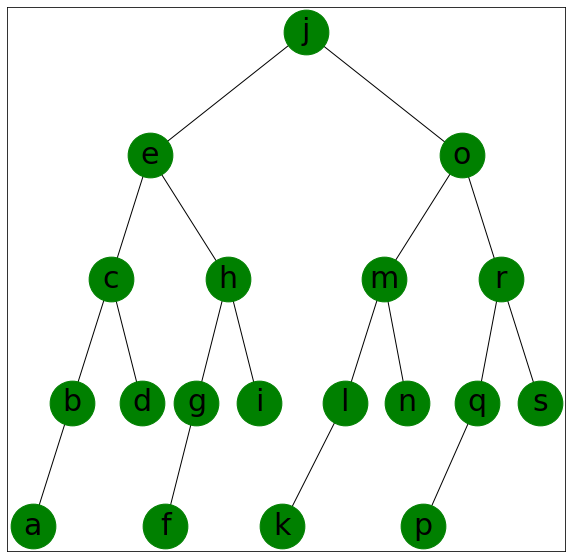

In [15]:
pos = {'a':(-3.5, 0), 'b':(-3,1), 'c':(-2.5, 2), 'd':(-2.1,1), 'e':(-2, 3), 'f':(-1.8, 0), 'g':(-1.4, 1), 'h':(-1.0, 2), 'i':(-0.6,1), 'j':(0,4), 'k':(-0.3, 0),
      'l':(0.5, 1),'m':(1,2),'n':(1.3, 1),'o':(2,3),'p':(1.5, 0),'q':(2.2, 1),'r':(2.5, 2), 's':(3,1)}
draw_balanced_binary_search_tree(bst6, pos) 

## 실습 2:
### (a) 너비 우선 탐색으로 주어진 그래프에서 주어진 소스 노드에서의 신장 트리 하나를 찾는 파이썬 코드를 작성하시오. 

In [16]:
import copy
def find_SpanningTree_by_bfs(graph, start, edges=[]): 
    graph_nodes= list(graph.keys())
    explored, edges, queue = list(), list(), [start]
    explored.append(start)
    while queue: #탐색할 큐에 노드가 있는 한 계속 수행  
        v = queue.pop(0)  # 큐에서  FIFO 순으로 큐의 제일앞에 있는 노드을  뽑음
        for w in graph[v]:   #현재 노드 v 의 인접 모드들에 대해 for looping        
            if w not in explored:                
                explored.append(w) #현 노드가 순회되지 않았으면 현 노드를 순회된 리스트에 등록               
                if (v,w) not in edges and (w,v) not in edges:              #if (v,w) not in edges :    
                    edges.append((v, w))
                    if len(edges)==len(graph) and explored.sort()==graph_nodes:
                        return edges  
                    #else: edges.pop(-1)
                queue.append(w) # 다음 레벨 탐색을 위해  큐에 해당 노드 를 저장함
    return edges

### (b) 상기 너비우선 탐색 기반 신장트리 검출 파이썬 코드를 이용하여 [그림 5] 의 그래프에서 노드 "S" 에서 출발하는 신장 트리를 하나 구해 보시오.

In [17]:
graph5 = {
       'B': ['F', 'L', 'N', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'L', 'N'],  
       'L': ['B', 'E', 'F', 'S'],
       'N': ['B', 'F', 'S'],
       'S': ['B', 'L', 'N']}
graph5

{'B': ['F', 'L', 'N', 'S'],
 'E': ['F', 'L'],
 'F': ['B', 'E', 'L', 'N'],
 'L': ['B', 'E', 'F', 'S'],
 'N': ['B', 'F', 'S'],
 'S': ['B', 'L', 'N']}

In [18]:
find_SpanningTree_by_bfs(graph5, 'S') 

[('S', 'B'), ('S', 'L'), ('S', 'N'), ('B', 'F'), ('L', 'E')]

### (c) 상기 너비우선 탐색 기반 신장트리 검출 파이썬 코드를 이용하여,  교과서 예제 Fig. 6 의 그래프에서 노드 "f' 에서 출발하는 신장 트리를 구해 보시오.

In [19]:
graph6 = {
       'a': ['c'],
       'b': ['c'],
       'c': ['a', 'b', 'e'],
       'd': ['e', 'f'],  
       'e': ['c', 'd', 'f'],
       'f': ['d', 'e', 'g', 'h'],
       'g': ['f', 'h'],
       'h': ['f', 'g', 'i', 'k'], 
       'i': ['h'],
       'j': ['k'],
       'k': ['h', 'j']    
      }
graph6

{'a': ['c'],
 'b': ['c'],
 'c': ['a', 'b', 'e'],
 'd': ['e', 'f'],
 'e': ['c', 'd', 'f'],
 'f': ['d', 'e', 'g', 'h'],
 'g': ['f', 'h'],
 'h': ['f', 'g', 'i', 'k'],
 'i': ['h'],
 'j': ['k'],
 'k': ['h', 'j']}

In [20]:
find_SpanningTree_by_bfs(graph6, 'f') 

[('f', 'd'),
 ('f', 'e'),
 ('f', 'g'),
 ('f', 'h'),
 ('e', 'c'),
 ('h', 'i'),
 ('h', 'k'),
 ('c', 'a'),
 ('c', 'b'),
 ('k', 'j')]

아래 그림처럼 엣지 정보가 일치함을 알 수 있다.

![Alttext](fig14_sol3.png)